In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [132]:
def plot_pairs(pairs, data):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [54]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [55]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-10
data: (297, 74)
pairs: (2151, 12)


In [56]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ABEV3,AZUL4,-3.093405,95,0.118353,10,0.632773,1.278939,Short/Long,3,"100,240,250"
1,100,ABEV3,B3SA3,-4.849140,99,0.220362,2,0.655613,0.183888,Long/Short,1,100
2,250,ABEV3,BBAS3,-2.995222,95,0.225892,10,0.573726,0.974151,Short/Long,6,"100,160,200,220,240,250"
3,250,ABEV3,BBDC3,-3.109886,95,0.344738,10,0.572527,1.008082,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,ABEV3,BBDC4,-3.093867,95,0.353484,10,0.554674,0.894916,Short/Long,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
2146,240,VIVT4,WEGE3,-2.975764,95,0.443316,11,0.360209,0.762603,Long/Short,8,"100,120,140,160,180,200,220,240"
2147,250,VIVT4,YDUQ3,-4.620495,99,0.345817,4,0.331312,0.450596,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2148,240,VVAR3,WEGE3,-2.910037,95,0.569052,12,0.565362,0.217024,Short/Long,1,240
2149,180,VVAR3,YDUQ3,-3.191910,95,0.371705,7,0.569442,1.033145,Short/Long,5,"100,120,140,160,180"


In [126]:
pairs_signal = pairs.loc[
    (pairs['Signal'] >= 1) \
    & (pairs['Signal'] <= 1.2) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,BTOW3,VALE3,-4.099739,99,1.741104,6,0.557591,1.196672,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,ELET3,PCAR3,-4.496931,99,0.477546,6,0.314905,1.105713,Short/Long,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [135]:
#plot_pairs(pairs_signal, data)

In [59]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [136]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [139]:
oper = pd.read_csv('datasets/oper/13072020.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,ELET3,PCAR3,-4.496931,99,0.477546,6,0.314905,1.105713,Short/Long,9,"100,120,140,160,180,200,220,240,250"


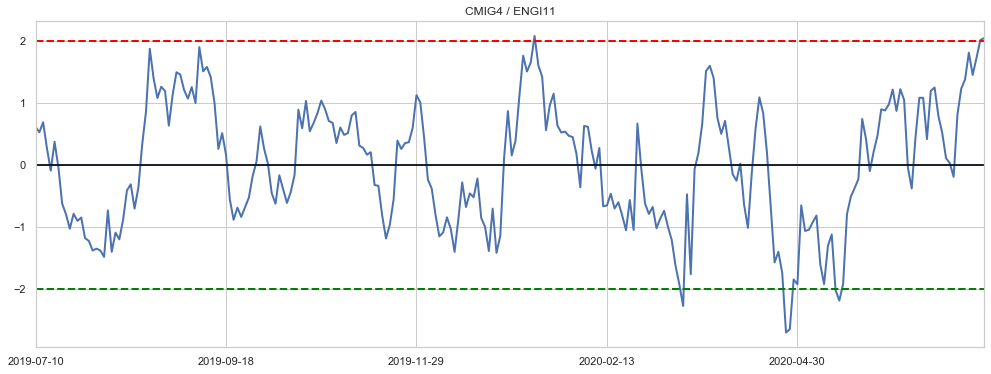

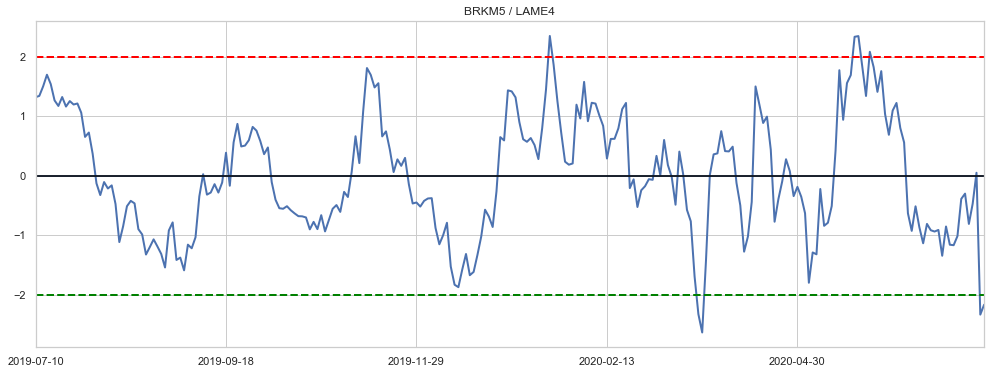

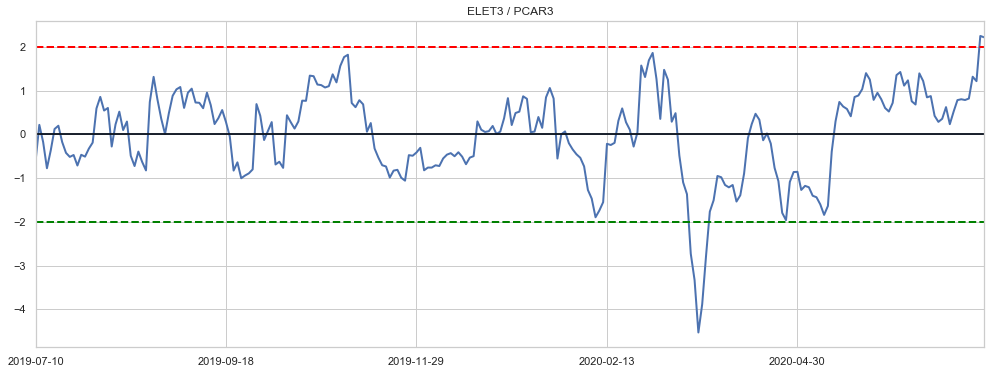

In [140]:
plotAll(oper, data)

In [158]:
mult.summary(data, 'CMIG4', 'ENGI11', 250)
mult.summary(data, 'BRKM5', 'LAME4', 250)
mult.summary(data, 'ELET3', 'PCAR3', 250)

Período de Análise                   250   Entrada      Venda:CMIG4 / Compra:ENGI11
Independente                       CMIG4   Dependente                        ENGI11
R$                                 11.52   R$                                 47.57
Ratio                0.24216944569409127   
→ CASH NEUTRAL ←
CMIG4                           -412.934   Financeiro R$                 -4756.9997
ENGI11                               100   Financeiro R$                     4757.0
                                                                             0.0003
→ BETA NEUTRAL ←
ENGI11                                29   Financeiro R$                    1379.53
CMIG4                               -100   Financeiro R$                    -1152.0
                                                                             227.53
Somente para operação Beta Neutral:
Retorno  (%)          11.032797097217761   Gain                   130.1056497228075
Atual    (%)           11.29389275632584   Los

In [155]:
mult.signal(data['PCAR3'], data['ELET3'], 2, 250)

{'descr': 'Long/Short',
 'signal': '',
 'is_signal': False,
 'resid_current': -4.526929674368347,
 'percent_dist_mean': 0.45841706135369964}